# Face Detection with Haar Cascades

We will be using Haar cascades, these are a key component of the Viola-Jones object detection framework. *Note this is detection, not recognition. 

The notebook will demonstrate detecting a face is present in an image. The research is from 2001, published by Paul Viola and Michael Jones on the ability to detect based on a simple concept around a few key features. They also came up with the idea of pre-computing an integral image to save time on calculations.

### What are pre-claculations?
This is an image with the totals summed already. eg.

![alt "integral summed image"](https://i.stack.imgur.com/mtPHG.png)

Therefore starting at the top left any subset rectangle can be selected and the pixel sums are already available in lookup form.

### What are the main features?
- Edge features (two tone)
- line features (two tone)
- four rectangle features (checkerboard)

The method is: each feature is a single value obtained by subtracting the sum of pixels under the white rectangles from the sum under the black rectangles. realistically, images will not be perfect edges or lines. so we will also calculate fractions and determine a probablilty ratio between a determined edge and a throwaway. 

### The calculation:
- (sum and mean) the dark region - (sum and mean) the light region

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

#plt.style.use('dark_background')

In [2]:
# Convenience functions 

def show(img, color=True):
    fig = plt.figure(figsize=(16,10))    
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

def show_many_gray(img1, img2, img3):
    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(1,3,1)
    ax2 = fig.add_subplot(1,3,2)
    ax3 = fig.add_subplot(1,3,3)
    ax1.imshow(img1, cmap='gray')
    ax2.imshow(img2, cmap='gray')
    ax3.imshow(img3, cmap='gray')

## load the Data

In [3]:
nadia = cv2.imread('DATA/Nadia_Murad.jpg', 0)
denis = cv2.imread('DATA/Denis_Mukwege.jpg', 0)
solvay = cv2.imread('DATA/solvay_conference.jpg', 0)

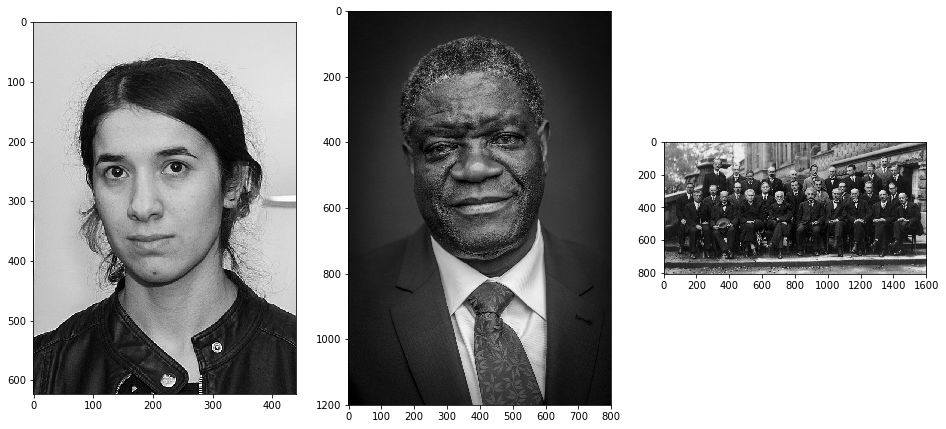

In [4]:
show_many_gray(nadia, denis, solvay)

### Load the cascade

In [5]:
face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')

### Define the detection function

In [6]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 10)
        
    return face_img

In [7]:
result_denis = detect_face(denis)
result_nadia = detect_face(nadia)
result_solvay = detect_face(solvay)

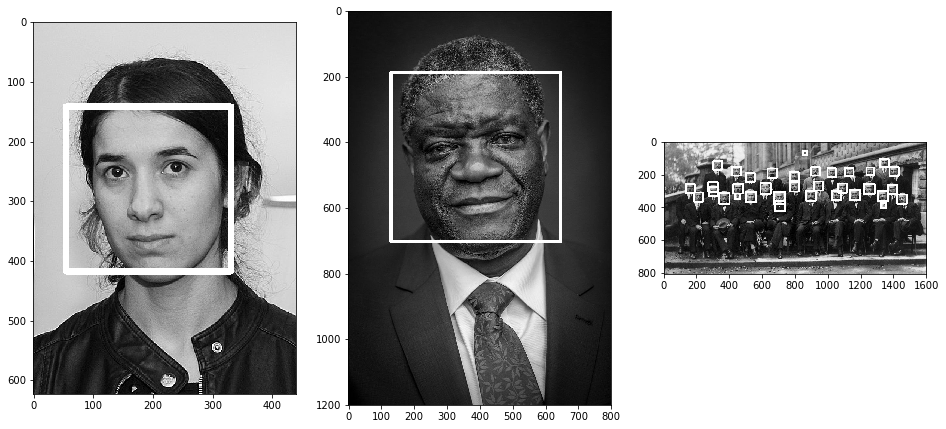

In [8]:
show_many_gray(result_nadia, result_denis, result_solvay)

### Scale functions and neighbours parameters 

In [9]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.18, minNeighbors = 4)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 5)
        
    return face_img

In [10]:
result_solvay = adj_detect_face(solvay)

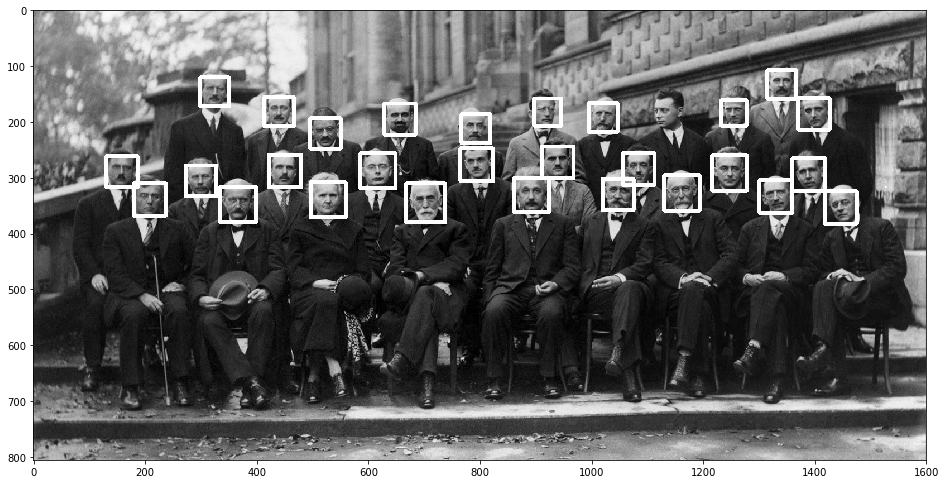

In [11]:
show(result_solvay)

### Eye Cascades

In [12]:
# define the new eye cascade
eye_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_eye.xml')

In [13]:
def detect_eyes(img):
    face_img = img.copy()
    eye_rects = eye_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 10)
        
    return face_img

In [14]:
result_denis = detect_eyes(denis)
result_nadia = detect_eyes(nadia)
result_solvay = detect_eyes(solvay)

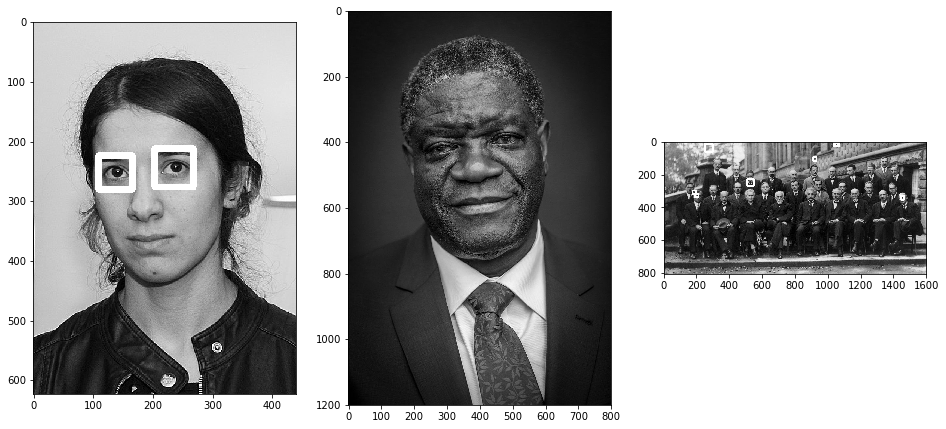

In [15]:
show_many_gray(result_nadia, result_denis, result_solvay)

### With VideoCapture 

In [16]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)
    frame = detect_face(frame)
    
    cv2.imshow('',frame)
    
    k = cv2.waitKey(1)
    if k == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()